<a href="https://colab.research.google.com/github/cristinarainich/Child-Mind-Institute-Project/blob/main/Pheno_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [17]:
from pathlib import Path
import pandas as pd
import numpy as np
import pylab as pl
import seaborn as sns
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.7/dist-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['full']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [19]:
sns.set()

In [3]:
working_path = Path('/content/drive/MyDrive/KKNV')

In [4]:
cd /content/drive/MyDrive/KKNV

/content/drive/MyDrive/KKNV


In [7]:
xx = pd.read_csv(
    working_path.joinpath('Pheno.csv'),
    index_col=None
)

In [8]:
xx.head()

,EID,Sex,Age,EHQ_Total,Commercial_Use,Full_Pheno
0,NDARJK487UCN,0,9.942276,83.34,Yes,Yes
1,NDARFW670TY2,0,8.792835,80.00,Yes,Yes
2,NDARHU395FP0,0,7.407027,76.67,Yes,Yes
3,NDARHV885JFU,0,8.893794,44.47,Yes,Yes
4,NDARCP753UEW,0,8.135295,100.00,Yes,Yes


In [11]:
xx.shape

(852, 6)

Sex 1 - female, 0 - male; EHQ_Total: +100 = Fully Right-Handed, -100 = Fully Left-Handed; full_pheno: Does the participant have a full phenotypic file?

Only 333 out of 852 have the full phenotypical file. All of them signed up for commercial use.


In [21]:
full = xx[xx['Full_Pheno'] == 'Yes']

In [38]:
# how many males and females 
full.groupby(['Sex']).count()

,EID,Age,EHQ_Total,Commercial_Use,Full_Pheno
Sex,,,,,
0,209,209,209,209,209
1,124,124,124,124,124


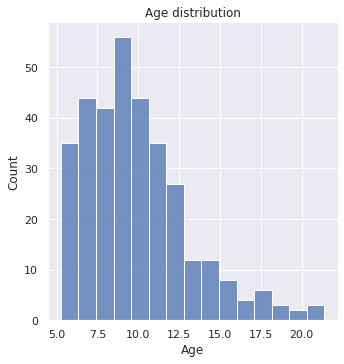

In [56]:
sns.displot(full.Age)
pl.title('Age distribution');

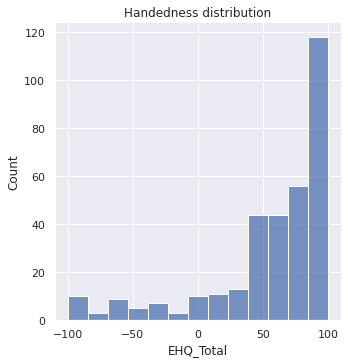

In [55]:
sns.displot(full.EHQ_Total)
pl.title('Handedness distribution');

236


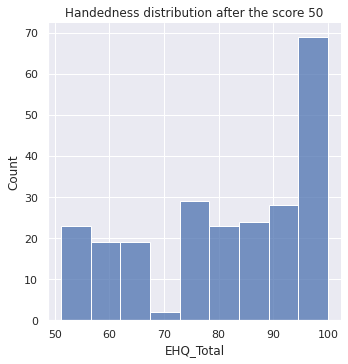

In [54]:
# number of people whose handedness score is greater than 50
print(full[full['EHQ_Total'] > 50].shape[0])
sns.displot(full[full['EHQ_Total'] > 50].EHQ_Total)
pl.title('Handedness distribution after the score 50');